<a href="https://colab.research.google.com/github/anvisud24/Projects/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
get_ipython().run_line_magic('matplotlib', 'inline')
mpl.rcParams['figure.dpi'] = 300

In [54]:
dataset = pd.read_csv("/content/gene_dataset_final.csv")
dataset.head()


,type,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,PTCHD1,M1AP,ZSCAN4,ZSCAN4.1,VWA5B1,VWA5B1.1,LINC00311,HTR6,MAGEB6,LOC101060464 /// LOC101929858 /// LOC101930165 /// LOC101930171 /// TCEB3C /// TCEB3CL /// TCEB3CL2
0,GBM,11.36747,9.323879,8.269753,9.632962,5.534698,8.484560,6.528278,6.342163,7.329453,...,6.856444,4.591885,4.739158,5.584155,5.342672,6.390374,5.267818,5.898453,3.354734,5.574529
1,GBM,12.11184,9.909101,8.590495,9.590659,4.558298,7.089286,6.925450,6.184260,5.697576,...,9.217207,3.738654,4.366223,5.694058,5.097125,6.574713,5.122915,6.044274,3.333139,4.978582
2,GBM,12.68623,9.432470,7.565431,8.513028,4.460844,7.726511,7.024936,5.948060,4.969492,...,9.372210,3.675539,3.945667,4.715144,5.444706,6.072424,4.426577,4.999496,3.340092,4.450215
3,GBM,12.95673,8.603778,8.311467,8.205823,4.256073,7.692394,8.013890,6.401934,6.197651,...,9.028017,4.319005,4.377076,4.400815,4.938128,5.338926,4.747617,5.201266,3.351883,4.344490
4,GBM,12.13290,9.142464,9.628997,8.700961,4.475803,8.451584,7.431643,5.828555,5.798270,...,8.155733,4.000151,4.131463,4.823794,5.083569,5.655747,4.932815,5.383674,3.495330,4.525855


In [55]:

X = dataset.iloc[:,1:]
X.head()


,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,PTCHD1,M1AP,ZSCAN4,ZSCAN4.1,VWA5B1,VWA5B1.1,LINC00311,HTR6,MAGEB6,LOC101060464 /// LOC101929858 /// LOC101930165 /// LOC101930171 /// TCEB3C /// TCEB3CL /// TCEB3CL2
0,11.36747,9.323879,8.269753,9.632962,5.534698,8.484560,6.528278,6.342163,7.329453,5.404884,...,6.856444,4.591885,4.739158,5.584155,5.342672,6.390374,5.267818,5.898453,3.354734,5.574529
1,12.11184,9.909101,8.590495,9.590659,4.558298,7.089286,6.925450,6.184260,5.697576,5.254970,...,9.217207,3.738654,4.366223,5.694058,5.097125,6.574713,5.122915,6.044274,3.333139,4.978582
2,12.68623,9.432470,7.565431,8.513028,4.460844,7.726511,7.024936,5.948060,4.969492,5.285216,...,9.372210,3.675539,3.945667,4.715144,5.444706,6.072424,4.426577,4.999496,3.340092,4.450215
3,12.95673,8.603778,8.311467,8.205823,4.256073,7.692394,8.013890,6.401934,6.197651,5.878660,...,9.028017,4.319005,4.377076,4.400815,4.938128,5.338926,4.747617,5.201266,3.351883,4.344490
4,12.13290,9.142464,9.628997,8.700961,4.475803,8.451584,7.431643,5.828555,5.798270,5.464882,...,8.155733,4.000151,4.131463,4.823794,5.083569,5.655747,4.932815,5.383674,3.495330,4.525855


In [70]:
Y=dataset.iloc[:,:1]
Y.head()



,type
0,GBM
1,GBM
2,GBM
3,GBM
4,GBM


In [67]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
print(X.shape)
PCs = sklearn_pca.fit_transform(X)
print(PCs.shape)


(69, 432)
(69, 2)


<Axes: xlabel='PC1', ylabel='PC2'>

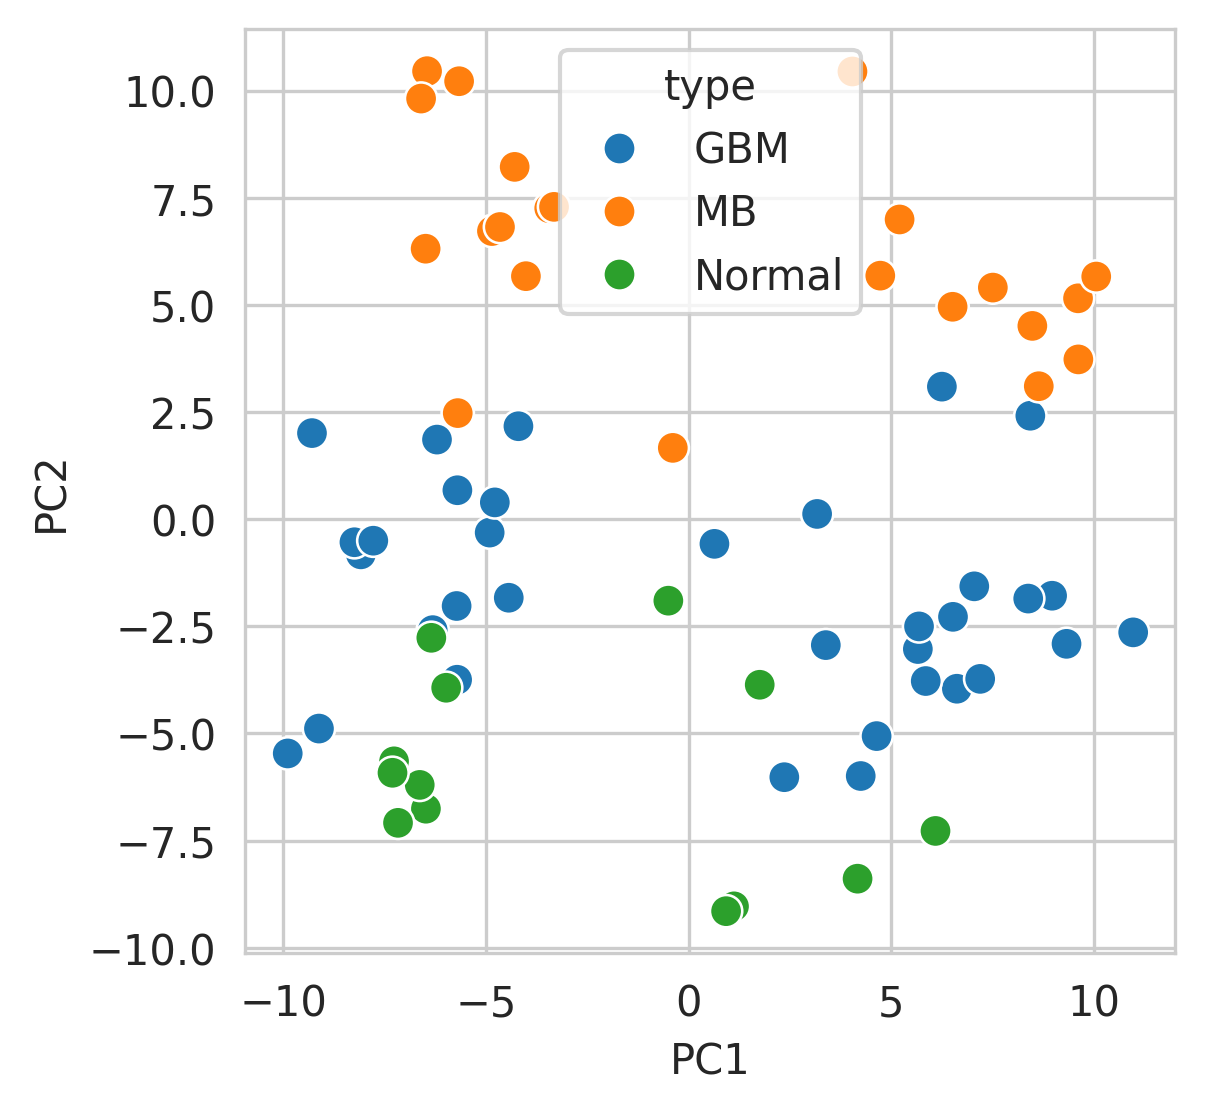

In [59]:
dataset_transform = pd.DataFrame(PCs,columns=['PC1','PC2'])
dataset_transform = pd.concat([dataset_transform,Y],axis=1)
fig, axes = plt.subplots(figsize=(4,4))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = dataset_transform,hue='type',s=60)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [61]:
clf = SVC(kernel='linear')

In [62]:
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [63]:
y_pred = clf.predict(X_test)


In [64]:
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9047619047619048


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8 0 1]
 [1 5 0]
 [0 0 6]]


0.9047619047619048

<Axes: >

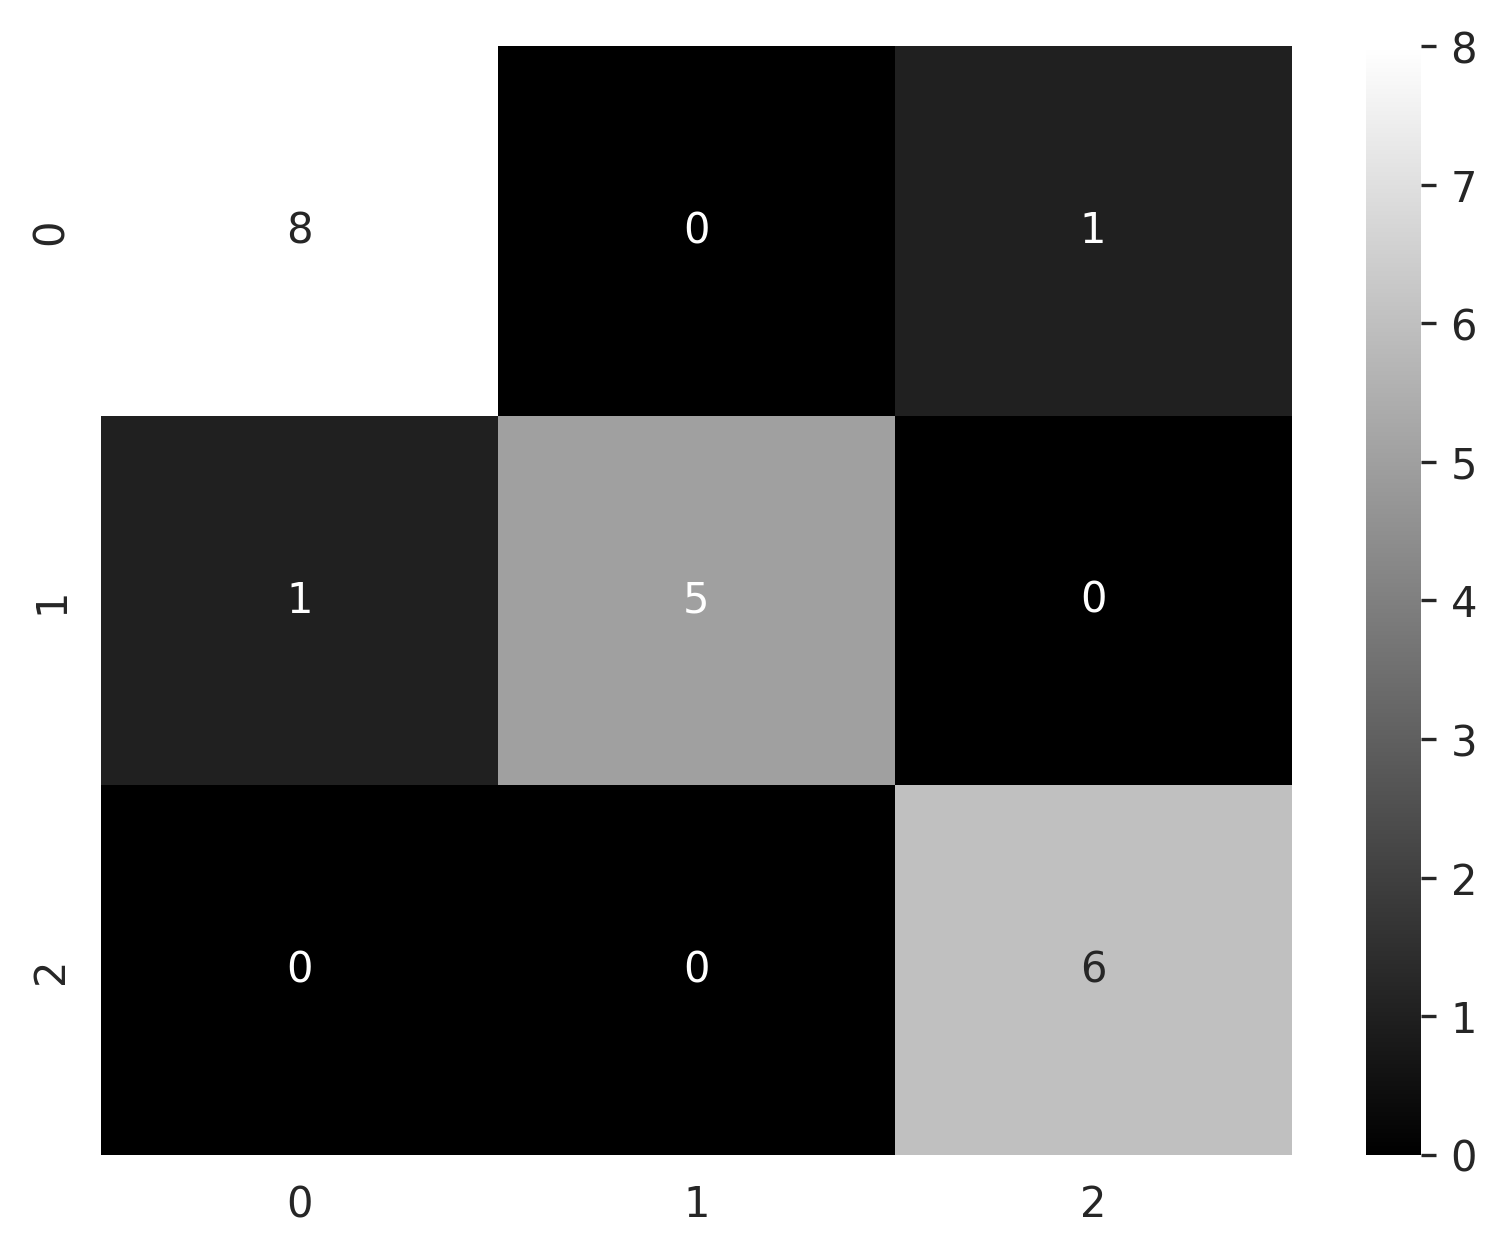

In [40]:

sns.heatmap(cm,annot=True,fmt='d',cmap="gray")

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         GBM       0.89      0.89      0.89         9
          MB       1.00      0.83      0.91         6
      Normal       0.86      1.00      0.92         6

    accuracy                           0.90        21
   macro avg       0.92      0.91      0.91        21
weighted avg       0.91      0.90      0.90        21



In [73]:
if clf.kernel == 'linear':
    # Get the feature names (assuming X has column names)
    feature_names = X.columns

    # Create the DataFrame with correct column names
    # Transpose clf.coef_ to align with feature names
    coeff_df = pd.DataFrame(clf.coef_, columns=feature_names)

    coeff_df = coeff_df.sort_values(by=coeff_df.columns.tolist(), ascending=False)
    print(coeff_df)
else:
    print("Coefficients are not directly available for non-linear kernel SVCs.")

   DDR1 /// MIR4640      RFC2     HSPA6      PAX8    GUCA1A  MIR5193 /// UBA7  \
0          0.029705  0.017730  0.014447  0.000221  0.009927          0.007747   
1          0.016053  0.023705  0.014594 -0.001671 -0.019358          0.003450   
2          0.003761  0.014745  0.003101 -0.000822 -0.018819         -0.001476   

       THRA    PTPN21      CCL5    CYP2E1  ...    PTCHD1      M1AP    ZSCAN4  \
0  0.004451 -0.010536 -0.003669 -0.001250  ...  0.010603  0.003149  0.001696   
1 -0.011486  0.002352  0.015314 -0.008477  ... -0.024447  0.007309 -0.002757   
2 -0.007801  0.005357  0.005368 -0.010083  ... -0.028437 -0.000247 -0.002059   

   ZSCAN4.1    VWA5B1  VWA5B1.1  LINC00311      HTR6    MAGEB6  \
0  0.003093  0.002128  0.002961  -0.002271  0.006637  0.001885   
1 -0.000619  0.000030 -0.003007  -0.000342 -0.000348 -0.001480   
2  0.000914 -0.004059 -0.001393  -0.001417 -0.006217 -0.001252   

   LOC101060464 /// LOC101929858 /// LOC101930165 /// LOC101930171 /// TCEB3C /// TCEB3CL

In [74]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
coefficients = clf.coef_


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
support_vectors = clf.support_vectors_
print("Support Vectors:")
print(support_vectors)

Support Vectors:
[[12.68623   9.43247   7.565431 ...  4.999496  3.340092  4.450215]
 [12.42215   8.175979  7.239501 ...  5.68668   3.410826  4.758504]
 [12.95673   8.603778  8.311467 ...  5.201266  3.351883  4.34449 ]
 ...
 [10.70182   8.467377  6.946708 ...  5.299178  3.558115  4.621185]
 [11.60726   7.082855  7.394746 ...  6.205028  3.590489  5.486828]
 [11.29989   8.28618   6.993723 ...  5.063995  3.348954  4.706811]]


In [76]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
coefficients = clf.coef_
print("Coefficients:")
print(coefficients)

Coefficients:
[[ 0.02970482  0.0177298   0.01444702 ...  0.00663682  0.00188498
   0.00197992]
 [ 0.01605318  0.02370526  0.01459449 ... -0.00034843 -0.0014804
  -0.00270305]
 [ 0.00376119  0.01474547  0.00310127 ... -0.00621656 -0.00125152
  -0.00453424]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
coefficients = clf.coef_
feature_names = X.columns

# Create a DataFrame to display the coefficients with feature names for each class
coeff_df = pd.DataFrame(coefficients, columns=feature_names, index=clf.classes_)

# Transpose the DataFrame for a more intuitive view
coeff_df = coeff_df.T

# Sort by the first column (index after transposing)
# Assuming the first column contains the coefficients after transposing
coeff_df = coeff_df.sort_values(by=coeff_df.columns[0],ascending = False)
coeff_df








,GBM,MB,Normal
CADM2.1,0.058569,0.001621,-0.038410
EPHB3,0.056521,0.016966,-0.009974
SCIN,0.045510,0.048852,0.005006
CADM2,0.041289,0.004077,-0.027309
SCIN.1,0.030905,0.043350,0.001216
...,...,...,...
CEP170 /// CEP170P1,-0.039265,0.008149,0.021471
BRSK1,-0.044642,-0.010394,0.003928
TMEM74.1,-0.046063,-0.020502,0.008243
NMNAT2,-0.049255,-0.038063,-0.027128


In [83]:
coeff_df = pd.DataFrame(clf.coef_, index = ['coefficients_class_0','coefficients_class_1','coefficients_class_2'], columns=X.columns)
# Removed the transpose (.T) from clf.coef_ as the original shape (432,3) aligns with the provided column and index counts.

In [84]:
coeff_df.to_excel('imp_feat.xlsx')

In [85]:
coeff_df.to_excel('imp_feat.xlsx')